In [60]:
import pandas as pd 
import numpy as np  

import matplotlib.pyplot as plt 
import seaborn as sns  
from wordcloud import WordCloud

import nltk 
from nltk.corpus import stopwords  
import re

from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
df = pd.read_csv(r"spam.csv", encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [35]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={"v1": "Label", "v2": "messages"},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [37]:
df.duplicated().sum()

403

In [38]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [40]:
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

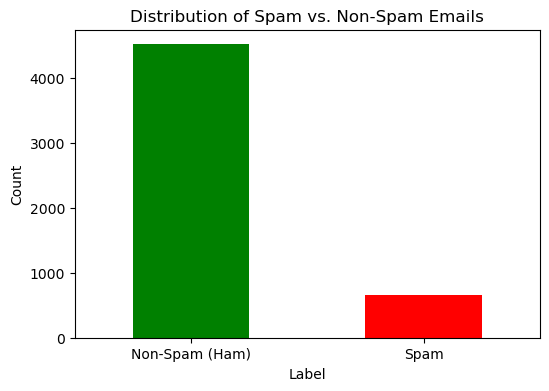

In [73]:
df['Label'].value_counts().plot(kind='bar', color=['green', 'red'], figsize=(6,4))
plt.title('Distribution of Spam vs. Non-Spam Emails')
plt.xticks(ticks=[0,1], labels=['Non-Spam (Ham)', 'Spam'], rotation=0)
plt.ylabel('Count')
plt.show()


In [42]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muneeza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
def preprocess_text(text):
    text = text.lower()  # Küçük harfe çevir
    text = re.sub(r'\d+', '', text)  # Sayıları kaldır
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama işaretlerini kaldır
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Stopwords'leri kaldır
    return text

df['clean_message'] = df['messages'].apply(preprocess_text)
df[['messages', 'clean_message']].head()

,messages,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


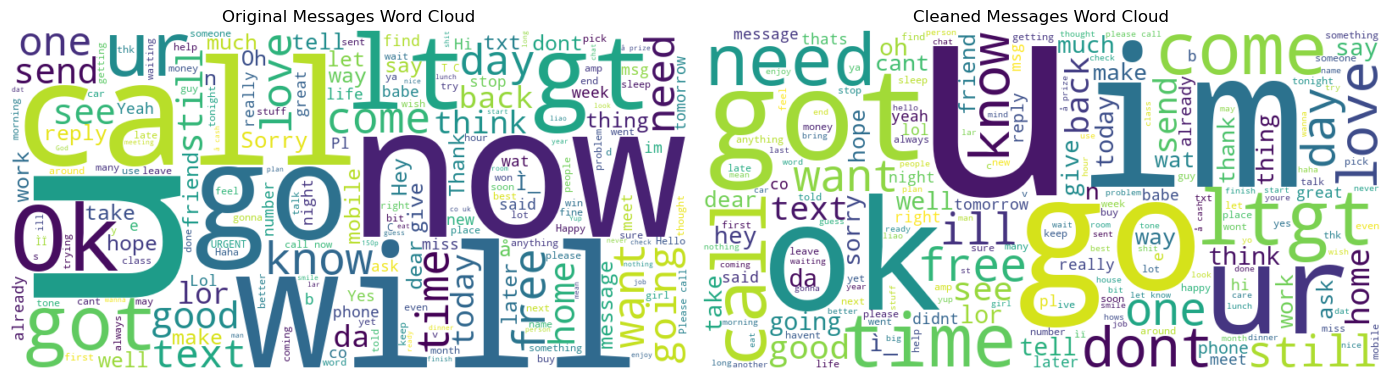

In [55]:
original_text = ' '.join(df['messages'])
cleaned_text = ' '.join(df['clean_message'])

original_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(original_text)
cleaned_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(original_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Original Messages Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(cleaned_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Cleaned Messages Word Cloud')

plt.tight_layout()
plt.show()

In [56]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

X.shape

(5169, 8467)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Label'], test_size=0.2, random_state=42)

In [63]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [71]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.4f}')

print(classification_report(y_test, y_pred))


Accuracy: 96.1315
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       889
           1       0.82      0.92      0.87       145

    accuracy                           0.96      1034
   macro avg       0.90      0.95      0.92      1034
weighted avg       0.96      0.96      0.96      1034



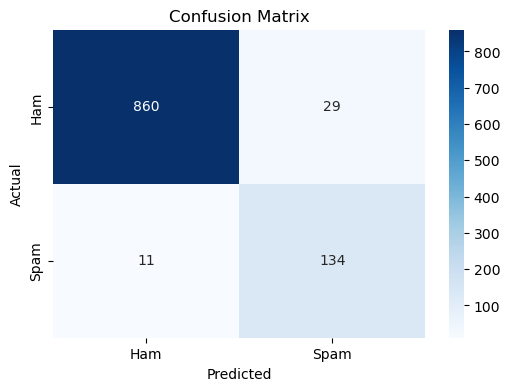

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
